# Anticipating Automotive Sales Prices for Inventory Aquisition

## Goal

Obtaining the proper vehicles to maximize profit in the used auto market can prove difficult. Our firm has obtained a dataset which includes the used vehicle values from all Craigslist used car listings during the current year, in an attempt to identify those features which have the greatest impact on automotive resale value. In addition, the data was fitted to a linear regression model to allow for predictive pricing capabilities for possible purchases.

---

## Exploring the Data

The dataset used in this analysis is the "Kaggle Used Cars Dataset: Vehicles listings from Craigslist.org". The data is made up of all content, as scraped from the Craigslist used vehicle listing section (nationally), during January 2020. It consists of 509,577 records, with 25 features. Of these, our study uses only those from our sales region (MD, VA, PA, and WV), as well as those records which are the most robust in terms of feature content; resulting in a filtered and formatted dataset of roughly 10,000 records. All records containing null values were discarded, as well as those records with values lying over 2 standard deviations from their respective means.

## Signifigant Features: Age

According to our data, a vehicle loses, on average $20,000 in value by reaching 10 years of age. This represents a majority of the value it will lose over its lifetime. 

<img src="Images/PricebyAge.png">

With that in mind, the volume of all vehicles sold in this market which are over 10 years old is 43%. Younger car = higher profit, but potential additional volatility between age cutoffs

<img src="Images/PricebyAgeVolume.png">

## Signifigant Features: Mileage

Similarly, a vehicle loses, on average $17,000  of value by reaching 100k  miles. Again a majority of the value it will lose over its lifetime. 

<img src="Images/PricebyMiles.png">

The volume of all vehicles sold in this market which have 100k+ miles is 54%.  < 100k Miles = higher profit, but potential additional volatility between mileage ranges.

<img src="Images/PricebyMilesVolume.png">

Utilizing sklearn's lmplot function the different data features were also checked for corellation to target and a fit line was rendered for some initial observation. For the continuous variables, I also split this out based on the categorical varibles to see if any of them had an effect on the relationship. Below are two samples.

<table><tr>
<td> <img src="Images/Cor1.png" style="width: 500px;"/> </td>
<td> <img src="Images/Cor2.png" style="width: 500px;"/> </td>
</tr></table>

## Other Features to Consider: Type, Engine Size, and Transmission

We note that certain vehicle types tend to demand higher prices, trucks for example are worth (on average) over twice as much as SUVs

<img src="Images/TypeChart.png">

Larger engine sizes also yield higher asking prices

<img src="Images/EngineChart.png">

Automatic transmissions are favored by the market

<img src="Images/TransPrice.png">

The preprocessed data for this analysis is located in the main repository [data](https://github.com/yeagercmbpd/DATA602_HW1_AutoPrices/blob/master/Data) file. 

The notebook detailing how it was created can be found [here](https://github.com/yeagercmbpd/DATA602_HW1_AutoPrices/blob/master/Notebooks/Kaggle_CLAutos_DataCleanup.ipynb).

The Kaggle page from which it was pulled is located [here](https://www.kaggle.com/austinreese/craigslist-carstrucks-data)

---
# Creating the Model

In [1]:
#Import needed libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from matplotlib import rc
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

Read our preprocessed data into a pandas df. Note categorical variables were encoded, this is detailed in the data cleaning notebook


In [2]:
MyRegion = pd.read_csv('Data/Cleaned_Filtered_Data.csv')

In [3]:
#Split Features and target
X = MyRegion[['age','odometer','Condition','Type','Manufacturer','Cylinders',"Transmission",'Model']].astype(int)

Y = MyRegion['price'].astype(int)


In [4]:
#X.dropna(inplace=True)
#Y.dropna(inplace=True)

## Our Linear Model

In [5]:
#use sklearn feature train_test_split to separate our dataset into a train and test set for both our dependant and ind
#variables. A test sample size of 10% was used. Then fit a linear regression model using sklearn and predict Y for x test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .10, random_state = 40)

MyRegModel = linear_model.LinearRegression()
MyRegModel.fit(X_train, Y_train)
predicted = MyRegModel.predict(X_test)

The highest R2 value we are able to achieve with this dataset using these methods is .65. In other words,
the features we have present are able to generate a model which can account for 65% of the variation in the price.

In [6]:
MyRegModel.score(X_train, Y_train)

0.6518710542393331

In [7]:
MyRegModel.score(X_test, Y_test)

0.6530906677590582

In [8]:
#Explore the results further using the statsmodels output detailed in class

X = X_train
y = Y_train
X = sm.add_constant(X)
mod = sm.OLS(y, X.astype(float), hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     1996.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:38:20   Log-Likelihood:                -85016.
No. Observations:                8535   AIC:                         1.700e+05
Df Residuals:                    8526   BIC:                         1.701e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.148e+04    376.092     30.535   

A similar R squared value is noted. We are also able to see that the variables for condition and model do not contribute signifigantly to our model. I theorize that this is because condition is subjective on the part of the seller, and may be biased. Also, model is an open text field for which over 2500 unqiue entries were made for our small subset of the whole dataset alone. If this were a structured field or if time were spent cleaning it up, I believe it would be much more useful. Backward selection (removing these) had no effect on model outcome.

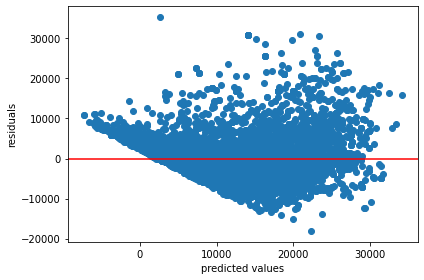

In [9]:
#Diagnosing the linear model using the below residual plot, it appears that our points are indeed random.
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')

plt.ylabel('residuals')

plt.tight_layout()

In [21]:
#Fun example using the Model. we create a new df containing some info for a potential vehicle purchase. If we decode this 
#back into its original values we find that it is a: 2015 BMW 6 series with 30k miles.

data = [[5,30000,4,8,21,6,2,106]]
Example = pd.DataFrame(data, columns = X_test.columns)
Example


,age,odometer,Condition,Type,Manufacturer,Cylinders,Transmission,Model
0,5,30000,4,8,21,6,2,106


In [22]:
#Our model predicts that this vehicle is worth approximately $23,000. 
MyRegModel.predict(Example)

array([22977.01684321])

To validate this, I ran a quick lookup on Kelly Blue Book, a company which values used vehicles. The results can be found below! Our model was pretty close in this case!

<img src="Images/KBB_Example1.PNG">


# Exploring Data Relationships and Visualizations

C:\Users\cyeager\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


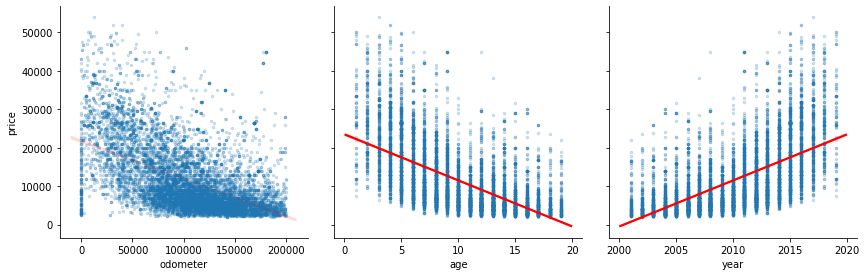

In [21]:
#Below we see a comparison of the relationship strength of the continuous varibles to target in the dataset.
g = sns.PairGrid(MyRegion, y_vars=["price"], x_vars=["odometer", "age","year"], height=4)
g.map(sns.regplot,fit_reg = True, line_kws={'color': 'red'},scatter_kws={'s': 6, 'alpha': 0.2})
#g.set(ylim=(-1, 11), yticks=[0, 5, 10])

C:\Users\cyeager\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


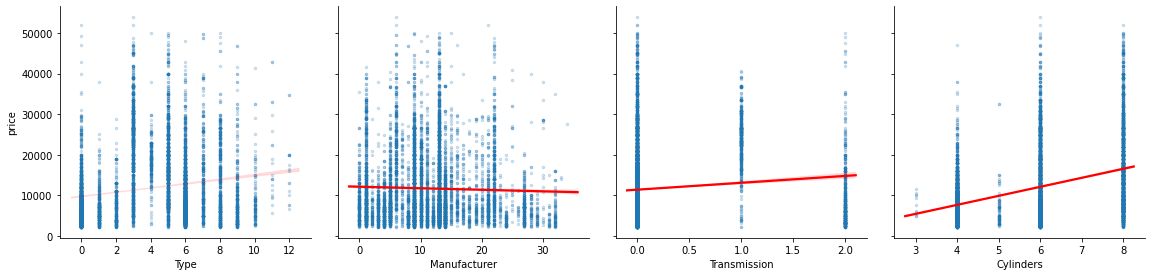

In [17]:
#Below we see a comparison of the relationship strength of the categorical varibles to target in the dataset.
#note we've omitted the varibles which the model noted as having P values which were not signifigant. 
g = sns.PairGrid(MyRegion, y_vars=["price"], x_vars=["Type", "Manufacturer","Transmission",'Cylinders'], height=4)
g.map(sns.regplot,fit_reg = True, line_kws={'color': 'red'},scatter_kws={'s': 6, 'alpha': 0.2})
#g.set(ylim=(-1, 11), yticks=[0, 5, 10])

The scatterplots below show the predicted values of the target overlayed with the actual values within the test set. Some of the visual similarity observed is promising.

Text(0.5, 1.0, 'Comparison of Model Output for Vehicle Age to Test Data')

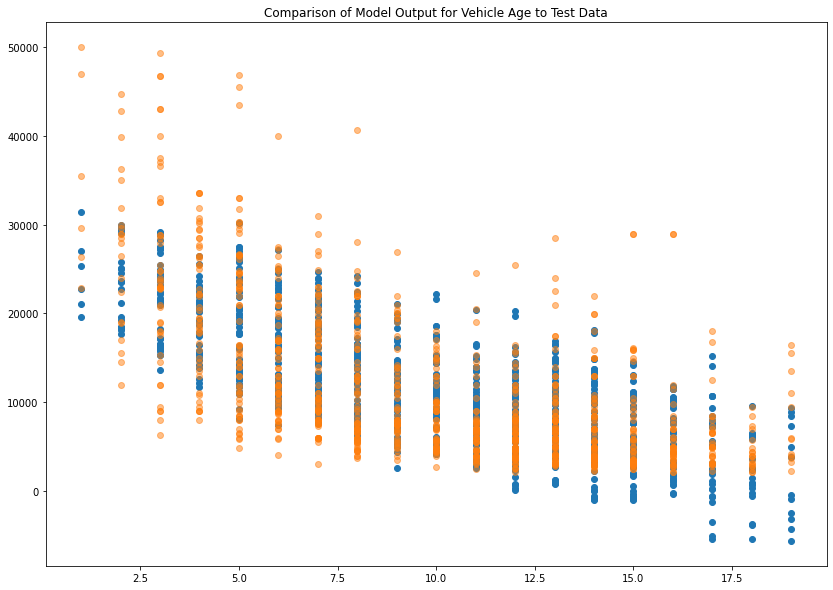

In [53]:
plt.scatter(X_test.age,predicted)
plt.scatter(X_test.age,Y_test, alpha=.5)
plt.title("Comparison of Model Output for Vehicle Age to Test Data")

Text(0.5, 1.0, 'Comparison of model output for Vehicle Milage to Test Data')

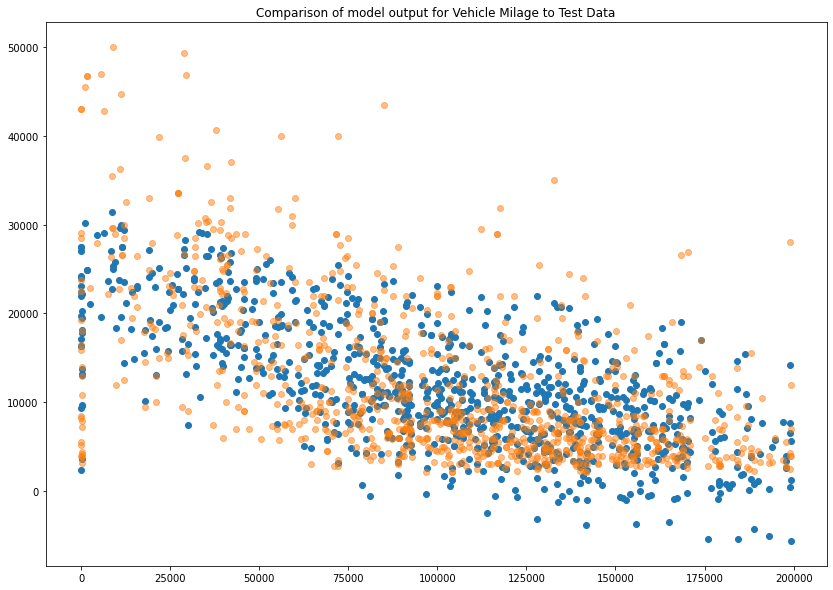

In [54]:
plt.scatter(X_test.odometer,predicted)
plt.scatter(X_test.odometer,Y_test, alpha=.5)
plt.title("Comparison of model output for Vehicle Milage to Test Data")

Text(0.5, 1.0, 'Comparison of model output for Vehicle Type to Test Data')

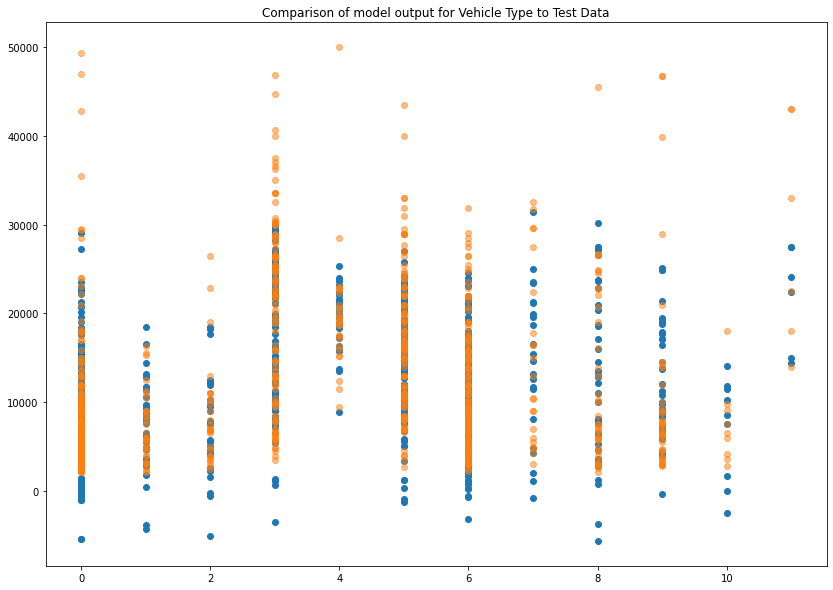

In [55]:
plt.scatter(X_test.Type,predicted)
plt.scatter(X_test.Type,Y_test, alpha=.5)
plt.title("Comparison of model output for Vehicle Type to Test Data")

Text(0.5, 1.0, 'Comparison of model output for Vehicle Make to Test Data')

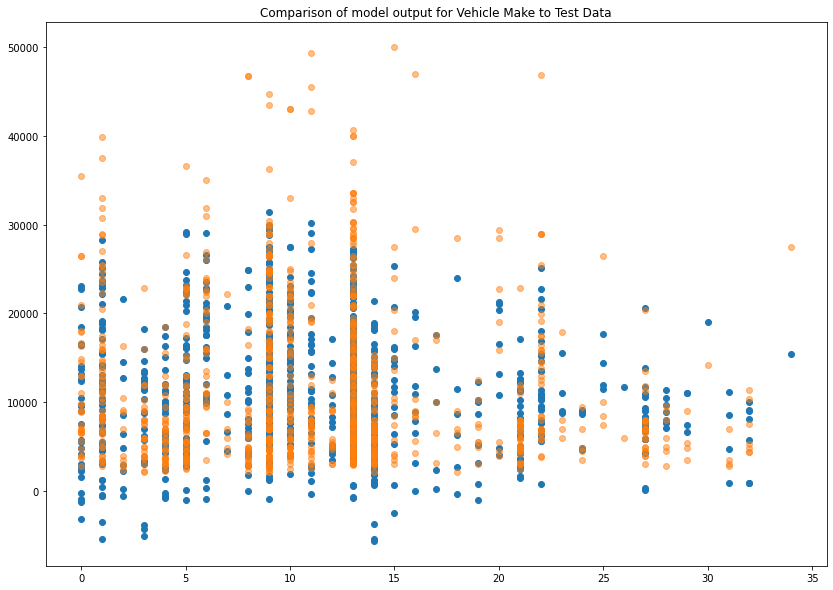

In [56]:
plt.scatter(X_test.Manufacturer,predicted)
plt.scatter(X_test.Manufacturer,Y_test, alpha=.5)
plt.title("Comparison of model output for Vehicle Make to Test Data")

Text(0.5, 1.0, 'Comparison of model output for Vehicle Transmission to Test Data')

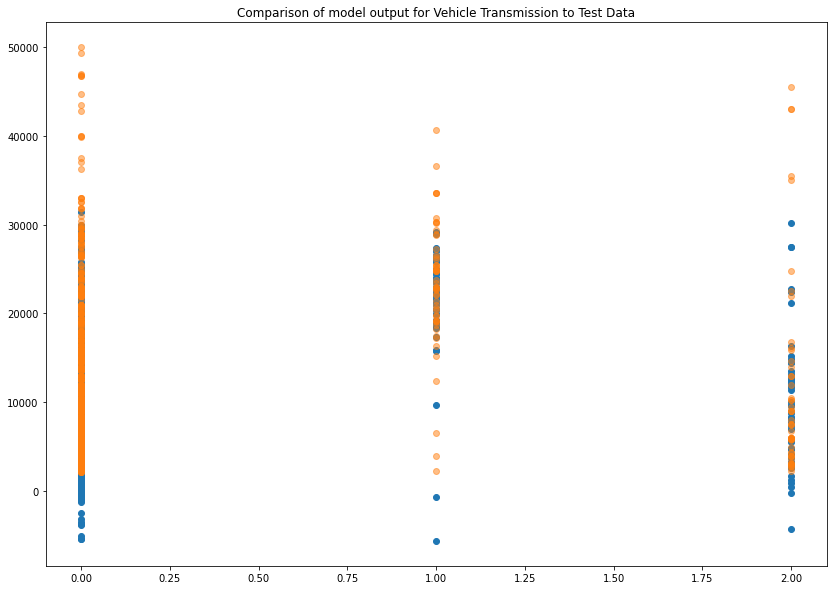

In [58]:
plt.scatter(X_test.Transmission,predicted)
plt.scatter(X_test.Transmission,Y_test, alpha=.5)
plt.title("Comparison of model output for Vehicle Transmission to Test Data")

# Conclusion

With the variables we had within our dataset we were able to fit a linear model. The coefficients and measurements of the model strength were not extremely strong, however, I beleive that we can reject the null hypothesis that the variables have no effect on/relationship with the target. Our R squared value of .65 is not a certainty by any means. That being said, it does achieve an explaination greater than random chance, an outcome that is favorable considering a problem with so many possibilities and factors at play. We were also able to demonstrate how the model can be used in a real scenario and the strength it has when compared to lengthy manual research. A dataframe of 1000 values could be run in seconds to get potential vehicle prices to compare to asking price, picking out "good deals" for users.